In [44]:
import numpy as np
import cv2 as cv
img = cv.imread('/home/pruthvirg/Desktop/test_1.png',0)
ret,thresh = cv.threshold(img,127,255,0)
im2,contours,hierarchy = cv.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv.moments(cnt)
print( M )

{'m00': 13509.0, 'm10': 1666699.1666666665, 'm01': 1520434.3333333333, 'm20': 225149953.3333333, 'm11': 173906470.5833333, 'm02': 198802132.8333333, 'm30': 32966561127.850002, 'm21': 21828530484.55, 'm12': 21198727480.95, 'm03': 29345551233.9, 'mu20': 19517699.86028862, 'mu11': -13680074.411711097, 'mu02': 27677655.671531737, 'mu30': 372179028.4724159, 'mu21': -136424875.0268755, 'mu12': -249495147.56667948, 'mu03': 740198935.5771294, 'nu20': 0.10695035534135468, 'nu11': -0.0749621538348136, 'nu02': 0.15166413718190083, 'nu30': 0.017546637083234833, 'nu21': -0.006431844859844562, 'nu12': -0.011762620871866523, 'nu03': 0.034897189519992565}


In [45]:
import matplotlib.pyplot as plt

In [46]:
epsilon = 0.1*cv.arcLength(cnt,True)
approx = cv.approxPolyDP(cnt,epsilon,True)

In [47]:
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.int0(box)
with_rect = cv.drawContours(img,[box],0,(0,0,20),2)

In [48]:
print(rect)

((137.7380828857422, 128.85791015625), (174.83624267578125, 145.31932067871094), -88.09085083007812)


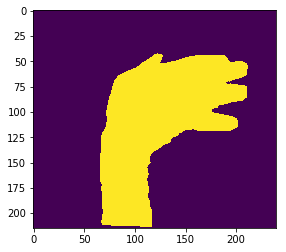

In [49]:
plt.imshow(with_rect)
plt.show()

In [50]:
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv.fitLine(cnt, cv.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
with_line = cv.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)

In [51]:
print(vx,vy,x,y)

[0.77318925] [-0.63417536] [134.69485] [101.875]


In [52]:
print(lefty,righty)

212 15


In [53]:
print(rows,cols)

215 240


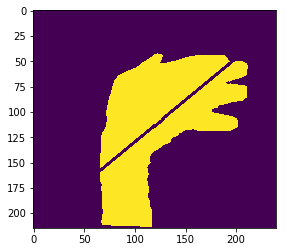

In [43]:
plt.imshow(with_line)
plt.show()